In [1]:
#Linearregression_MVA

In [2]:
#####****** cut the data set for 30 days, and only train the remaining with models

In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yfinance --upgrade --no-cache-dir

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install Keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install pydot graphviz

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

  Obtaining dependency information for wrapt>=1.11.0 from https://files.pythonhosted.org/packages/cf/c3/0084351951d9579ae83a3d9e38c140371e4c6b038136909235079f2e6e78/wrapt-1.16.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for keras>=3.0.0 from https://files.pythonhosted.org/packages/59/a8/d94e8acb59d678d908fe1db0c7ad89dfa2c2e2e529eeb3c2b3cc218a758d/keras-3.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for markdown>=2.6.8 from https://files.pythonhosted.org/packages/fc/b3/0c0c994fe49cd661084f8d5dc06562af53818cc0abefaca35bdc894577c3/Markdown-3.6-py3-none-any.whl.metadata
  Obtaining dependency information for werkzeug>=1.0.1 from https://files.pythonhosted.org/packages/e3/23/c9843d7550092ae7ad380611c238f44afef66f58f76c1dab7dcf313e4339/werkzeug-3.0.2-py3-none-any.whl.metadata
  Obtaining dependency information for markdown-it-py>=2.2.0 from https://files.pythonhosted.org/packages/42/d7/1ec15b46af6af88f19b8e5ffea08fa375d433c998b8a7639e76935c14f1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.2 requires pyarrow>=7.0, which is not installed.
streamlit 1.32.2 requires tenacity<9,>=8.1.0, which is not installed.
streamlit 1.32.2 requires toml<2,>=0.10.1, which is not installed.
streamlit 1.32.2 requires watchdog>=2.1.5; platform_system != "Darwin", which is not installed.


In [7]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import yfinance as yf
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import plotly.graph_objects as go
from matplotlib import pyplot as plt
%matplotlib inline
import pydot
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from keras.utils import plot_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score
import joblib

[*********************100%%**********************]  1 of 1 completed


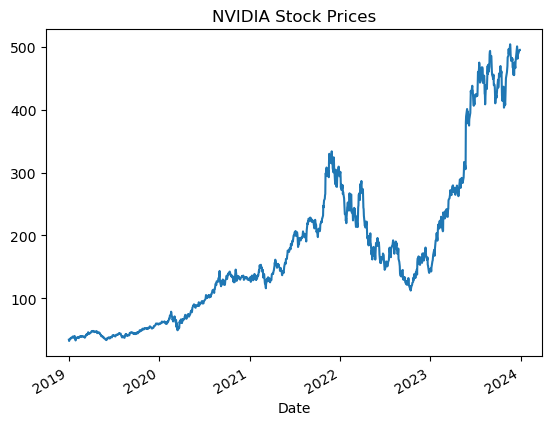

In [2]:
data = yf.download("NVDA", start="2019-01-01", end="2024-01-01")
data['Close'].plot()
plt.title("NVIDIA Stock Prices")
plt.show()

[*********************100%%**********************]  1 of 1 completed


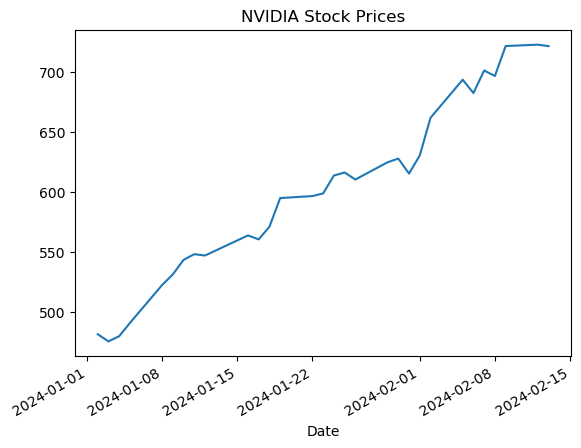

In [5]:
data2 = yf.download("NVDA", start="2024-01-02", end="2024-02-14")
data2['Close'].plot()
plt.title("NVIDIA Stock Prices")
plt.show()

[*********************100%%**********************]  1 of 1 completed


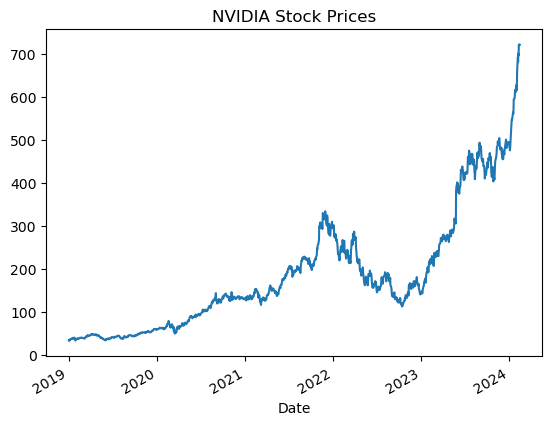

In [6]:
data3 = yf.download("NVDA", start="2019-01-01", end="2024-02-14")
data3['Close'].plot()
plt.title("NVIDIA Stock Prices")
plt.show()

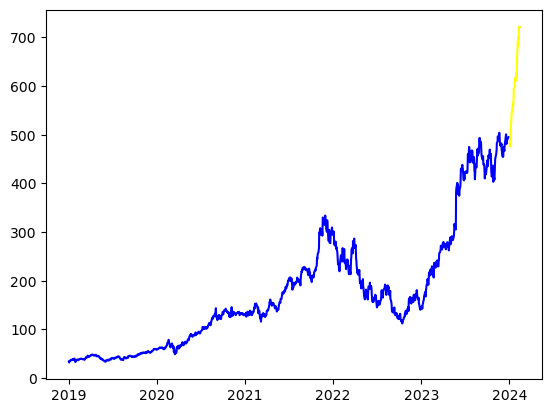

In [7]:
plt.plot(data['Close'],color='blue', label='Close until 2024-01-01')
plt.plot(data2['Close'],color='yellow', label='Close from 2024-01-02')
#plt.plot(data3['Close'],color='red', label='Whole Close')

In [8]:
# Save the DataFrame to a CSV file
data.to_csv('NVIDIA_FinalP_cut_data.csv', index=False) 

In [9]:
# Save the DataFrame to a CSV file
data2.to_csv('NVIDIA_FinalP_extra_data.csv', index=False) 

In [10]:
# Save the DataFrame to a CSV file
data3.to_csv('NVIDIA_FinalP_org_data.csv', index=False) 

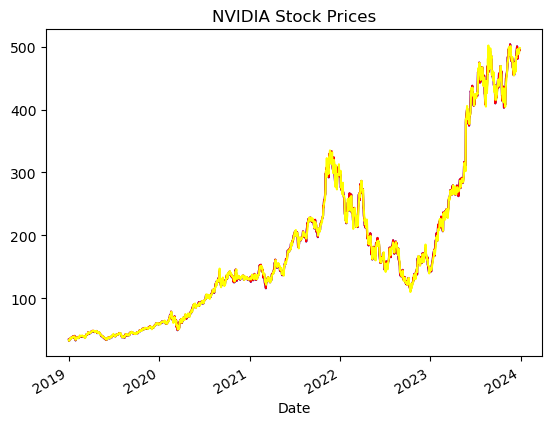

In [11]:
data['Adj Close'].plot(color='blue', label='Adj Close')
data['Close'].plot(color='red', label='Close')
data['Open'].plot(color='yellow', label='Open')
plt.title("NVIDIA Stock Prices")
plt.show()

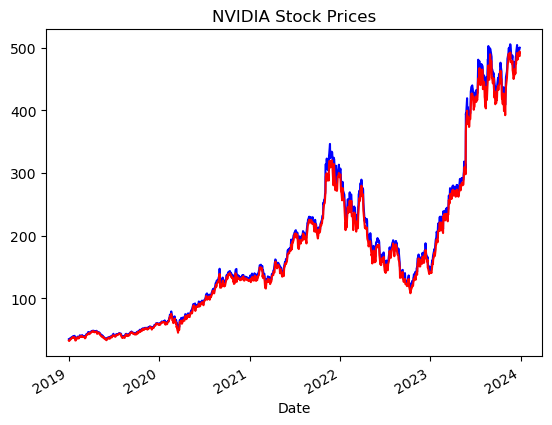

In [12]:
data['High'].plot(color='blue', label='High')
data['Low'].plot(color='red', label='Low')
plt.title("NVIDIA Stock Prices")
plt.show()

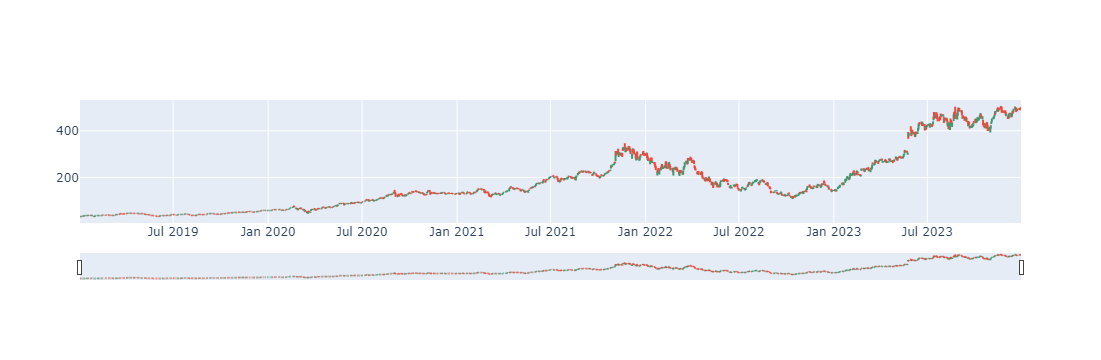

In [13]:
fig = go.Figure(data=go.Ohlc(x=data.index,
                              open=data['Open'],
                              high=data['High'],
                              low=data['Low'],
                              close=data['Close']))
fig.show()

In [14]:
df = data

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



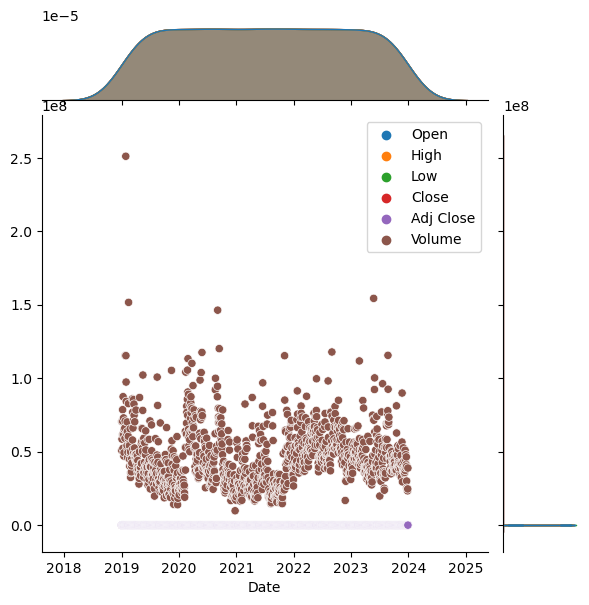

In [15]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(df, kind='scatter', color='seagreen')

In [16]:
#data to be tested
data.shape

(1258, 6)

In [17]:
df = data

In [18]:
df.shape

(1258, 6)

In [19]:
#extra 30 days data
data2.shape

(30, 6)

In [20]:
df2 = data2

In [21]:
#whole data
data3.shape

(1288, 6)

In [22]:
df3 = data3

In [23]:
print("Null Value present: ", data.isnull().values.any())

Null Value present:  False


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [25]:
data.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-01-02  32.660000  34.619999  32.512501  34.055000  33.788895  50875200
2019-01-03  33.447498  33.790001  31.922501  31.997499  31.747469  70555200
2019-01-04  32.735001  34.432499  32.424999  34.047501  33.781448  58562000
2019-01-07  34.625000  36.222500  34.107498  35.849998  35.569870  70916000
2019-01-08  36.672501  36.695000  34.224998  34.957500  34.684334  78601600

In [26]:
df = data

In [27]:
#take out last 50 to predict next 30 days of mva20
df20 = df.iloc[:-50].copy()

In [28]:
#take out last 80 to predict next 30 days of mva50
df50 = df.iloc[:-80].copy()

In [29]:
df.shape

(1258, 6)

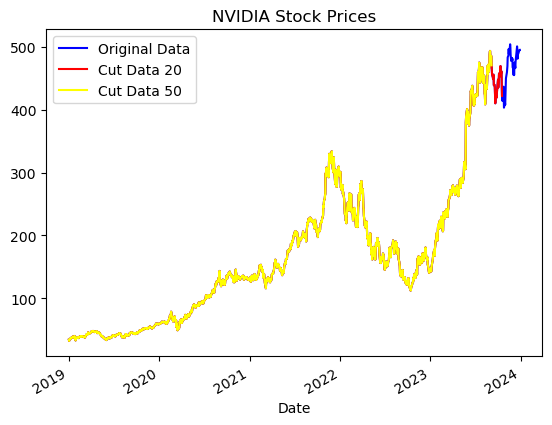

In [30]:
df['Close'].plot(color='blue', label='Original Data')
plt.title("NVIDIA Stock Prices")
df20['Close'].plot(color='red', label='Cut Data 20')
df50['Close'].plot(color='yellow', label='Cut Data 50')
plt.legend()
plt.show()

C:\Users\ross0\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



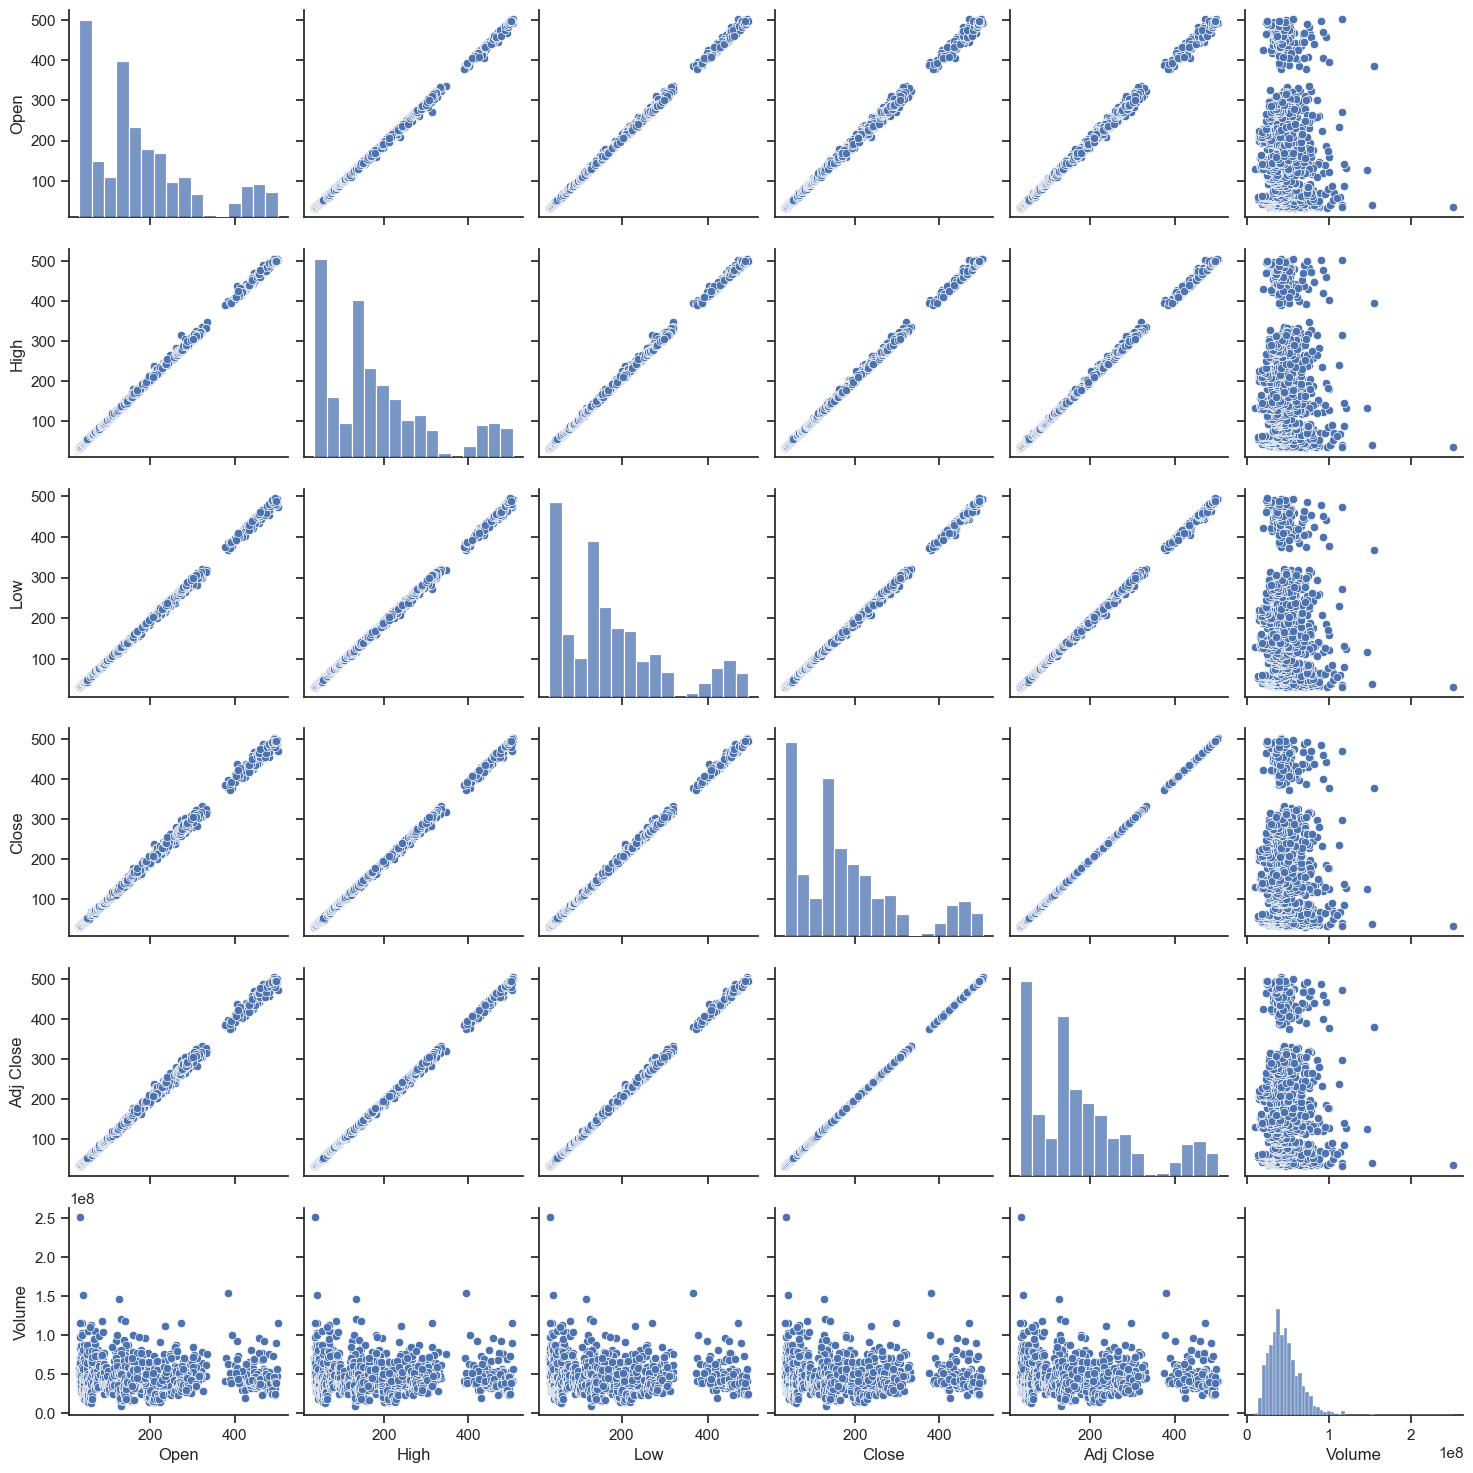

In [32]:
sns.set_theme(style="ticks")
sns.pairplot(df)

In [31]:
# Save the DataFrame to a CSV file
df.to_csv('NVIDIA_FinalP_copy_of_cut_data.csv', index=False) 

In [32]:
df.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-01-02  32.660000  34.619999  32.512501  34.055000  33.788895  50875200
2019-01-03  33.447498  33.790001  31.922501  31.997499  31.747469  70555200
2019-01-04  32.735001  34.432499  32.424999  34.047501  33.781448  58562000
2019-01-07  34.625000  36.222500  34.107498  35.849998  35.569870  70916000
2019-01-08  36.672501  36.695000  34.224998  34.957500  34.684334  78601600

In [33]:
#Manual/ is not used to predict stocks

Text(0, 0.5, 'Price')

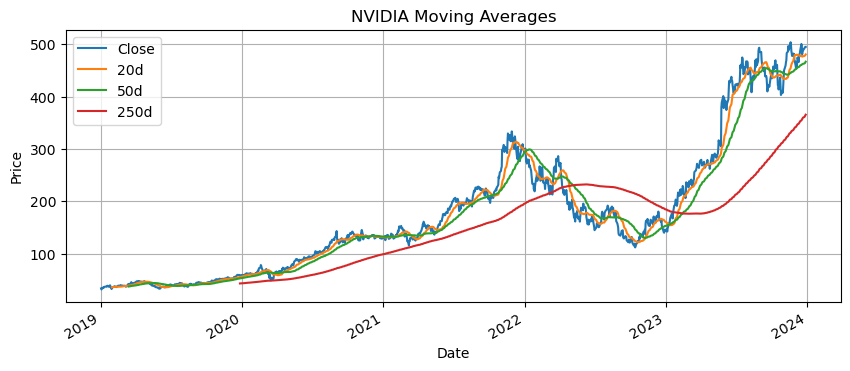

In [34]:
#mva visual
stockprices = df
#20 days to represent the 21 trading days in a month
stockprices['20d'] = stockprices['Close'].rolling(20).mean()
stockprices['50d'] = stockprices['Close'].rolling(50).mean()
stockprices['250d'] = stockprices['Close'].rolling(250).mean()
stockprices[['Close','20d','50d','250d']].plot(figsize=(10,4))
plt.grid(True)
plt.title('NVIDIA Moving Averages')
plt.axis('tight')
plt.ylabel('Price')

In [35]:
df.head(1)

Open       High        Low   Close  Adj Close    Volume  20d  \
Date                                                                        
2019-01-02  32.66  34.619999  32.512501  34.055  33.788895  50875200  NaN   

            50d  250d  
Date                   
2019-01-02  NaN   NaN

In [36]:
df = df.drop(['20d', '50d','250d'], axis=1)

In [37]:
df.head(1)

Open       High        Low   Close  Adj Close    Volume
Date                                                                
2019-01-02  32.66  34.619999  32.512501  34.055  33.788895  50875200

In [38]:
#changeovertime

In [39]:
df['Change_ot'] = ((df['Open'] - df['Close']) / df['Open']) * -1

In [40]:
df.head(1)

Open       High        Low   Close  Adj Close    Volume  \
Date                                                                   
2019-01-02  32.66  34.619999  32.512501  34.055  33.788895  50875200   

            Change_ot  
Date                   
2019-01-02   0.042713

In [41]:
#linearregression_mva

In [42]:
df.head(1)

Open       High        Low   Close  Adj Close    Volume  \
Date                                                                   
2019-01-02  32.66  34.619999  32.512501  34.055  33.788895  50875200   

            Change_ot  
Date                   
2019-01-02   0.042713

In [43]:
# Calculate moving averages
df20['20d_ma'] = df20['Close'].rolling(window=20).mean()
df50['50d_ma'] = df50['Close'].rolling(window=50).mean()

In [44]:
# Shift the "Adj Close" column by one day and store it in the same column
df20['Adj Close'] = df20['Adj Close'].shift(-1)

# Drop the last row since there won't be a target value for it after shifting
df20 = df20[:-1]

In [45]:
# Shift the "Adj Close" column by one day and store it in the same column
df50['Adj Close'] = df50['Adj Close'].shift(-1)

# Drop the last row since there won't be a target value for it after shifting
df50 = df50[:-1]

In [46]:
df.head(5)

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2019-01-02  32.660000  34.619999  32.512501  34.055000  33.788895  50875200   
2019-01-03  33.447498  33.790001  31.922501  31.997499  31.747469  70555200   
2019-01-04  32.735001  34.432499  32.424999  34.047501  33.781448  58562000   
2019-01-07  34.625000  36.222500  34.107498  35.849998  35.569870  70916000   
2019-01-08  36.672501  36.695000  34.224998  34.957500  34.684334  78601600   

            Change_ot  
Date                   
2019-01-02   0.042713  
2019-01-03  -0.043351  
2019-01-04   0.040095  
2019-01-07   0.035379  
2019-01-08  -0.046765

In [47]:
df20.head(5)

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2019-01-02  32.660000  34.619999  32.512501  34.055000  31.747469  50875200   
2019-01-03  33.447498  33.790001  31.922501  31.997499  33.781448  70555200   
2019-01-04  32.735001  34.432499  32.424999  34.047501  35.569870  58562000   
2019-01-07  34.625000  36.222500  34.107498  35.849998  34.684334  70916000   
2019-01-08  36.672501  36.695000  34.224998  34.957500  35.366470  78601600   

            20d_ma  
Date                
2019-01-02     NaN  
2019-01-03     NaN  
2019-01-04     NaN  
2019-01-07     NaN  
2019-01-08     NaN

In [48]:
df20.head(1)

Open       High        Low   Close  Adj Close    Volume  20d_ma
Date                                                                        
2019-01-02  32.66  34.619999  32.512501  34.055  31.747469  50875200     NaN

In [49]:
df50.head(1)

Open       High        Low   Close  Adj Close    Volume  50d_ma
Date                                                                        
2019-01-02  32.66  34.619999  32.512501  34.055  31.747469  50875200     NaN

In [50]:
df.shape

(1258, 7)

In [51]:
#first 20 is nan for mva20
df20.shape

(1207, 7)

In [52]:
1258-1207

51

In [53]:
#first 50 is nan for mva50
df50.shape

(1177, 7)

In [54]:
# Drop NaN values resulting from rolling means calculation
df50.dropna(inplace=True)

In [55]:
df50.shape

(1128, 7)

In [56]:
# Drop NaN values resulting from rolling means calculation
df20.dropna(inplace=True)

In [57]:
df20.shape

(1188, 7)

In [58]:
# Define features and target variable
features = ['20d_ma','Open','High', 'Low']  
target = 'Adj Close'

#Train-test split for '20d_ma'
X_train_20d, X_test_20d, y_train_20d, y_test_20d = train_test_split(df20[['20d_ma','Open','High', 'Low']], df20[target], test_size=0.2, random_state=42)


# Train linear regression model for '20d_ma'
model_20d = linear_model.LinearRegression()
model_20d.fit(X_train_20d, y_train_20d)

# Make predictions for '20d_ma'
y_pred_20d = model_20d.predict(X_test_20d)

# Evaluate the model for '20d_ma'
mse_20d = mean_squared_error(y_test_20d, y_pred_20d)
r2_score_20d = r2_score(y_test_20d, y_pred_20d)
print("Mean Squared Error (20d_ma):", mse_20d)
print("R^2 Score (20d_ma):", r2_score_20d)

Mean Squared Error (20d_ma): 38.932943551848105
R^2 Score (20d_ma): 0.9967080157571643


In [59]:
X_train_20d.head(1)

20d_ma       Open       High        Low
Date                                                  
2020-04-06  59.467625  63.810001  67.470001  63.232498

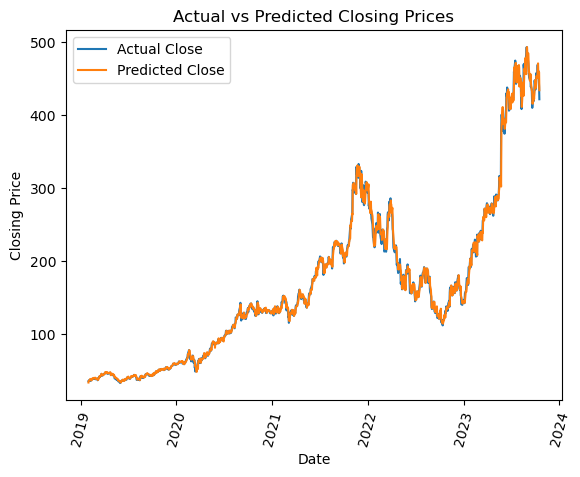

In [60]:
# Plot actual closing prices
plt.plot(df20.index, df20['Adj Close'], label='Actual Close')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=75)

# # Plot predicted closing prices
plt.plot(df20.index,  model_20d.predict(df20[['20d_ma','Open','High', 'Low']]), label='Predicted Close')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')

# Add legend
plt.legend()

# Show plot
plt.show()

In [61]:
# Define features and target variable
features = ['50d_ma','Open','High', 'Low']  
target = 'Adj Close'


# Train-test split for '50d_ma'
X_train_50d, X_test_50d, y_train_50d, y_test_50d = train_test_split(df50[['50d_ma','Open','High', 'Low']], df50[target], test_size=0.2, random_state=42)


# Train linear regression model for '50d_ma'
model_50d = linear_model.LinearRegression()
model_50d.fit(X_train_50d, y_train_50d)

# Make predictions for '50d_ma'
y_pred_50d = model_50d.predict(X_test_50d)

# Evaluate the model for '50d_ma'
mse_50d = mean_squared_error(y_test_50d, y_pred_50d)
r2_score_50d = r2_score(y_test_50d, y_pred_50d)
print("Mean Squared Error (50d_ma):", mse_50d)
print("R^2 Score (50d_ma):", r2_score_50d)

Mean Squared Error (50d_ma): 57.40011935337597
R^2 Score (50d_ma): 0.9938297574280409


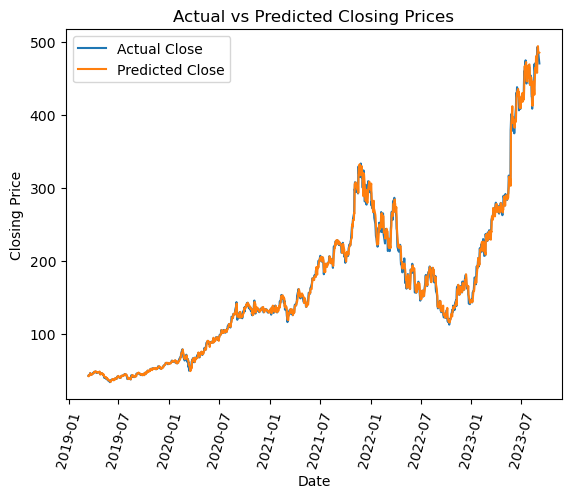

In [62]:
# Plot actual closing prices
plt.plot(df50.index, df50['Adj Close'], label='Actual Close')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=75)

# # Plot predicted closing prices
plt.plot(df50.index,  model_50d.predict(df50[['50d_ma','Open','High', 'Low']]), label='Predicted Close')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')

# Add legend
plt.legend()

# Show plot
plt.show()

In [63]:
df.head(1)

Open       High        Low   Close  Adj Close    Volume  \
Date                                                                   
2019-01-02  32.66  34.619999  32.512501  34.055  33.788895  50875200   

            Change_ot  
Date                   
2019-01-02   0.042713

In [64]:
df20.head(1)

Open     High        Low    Close  Adj Close    Volume  20d_ma
Date                                                                         
2019-01-30  33.6675  34.4925  32.865002  34.3475  35.656685  97422800  36.264

In [65]:
df50.head(1)

Open     High      Low      Close  Adj Close    Volume  \
Date                                                                      
2019-03-14  42.247501  42.3675  41.3125  41.389999  42.164185  51938400   

             50d_ma  
Date                 
2019-03-14  37.6742

In [66]:
#code to drop columns
#df = df.drop(['20d_ma','50d_ma'], axis=1)

In [67]:
X_test_20d['20d_ma']

Date
2020-05-06     71.408125
2023-09-01    454.689500
2022-09-06    168.862000
2019-06-04     38.366625
2022-10-17    123.587499
                 ...    
2021-06-21    171.654125
2022-05-02    216.017501
2019-12-18     54.089750
2023-05-18    283.522000
2021-08-31    208.051501
Name: 20d_ma, Length: 238, dtype: float64

In [68]:
X_test_20d_sorted = X_test_20d['20d_ma'].sort_index()
y_test_20d_sorted = y_test_20d.sort_index()

In [69]:
X_test_20d_sorted

Date
2019-02-13     37.090499
2019-03-05     38.578375
2019-03-15     39.528750
2019-04-03     43.073875
2019-04-10     45.076125
                 ...    
2023-09-15    465.707001
2023-09-27    449.258502
2023-10-05    436.577504
2023-10-11    437.844504
2023-10-13    439.307004
Name: 20d_ma, Length: 238, dtype: float64

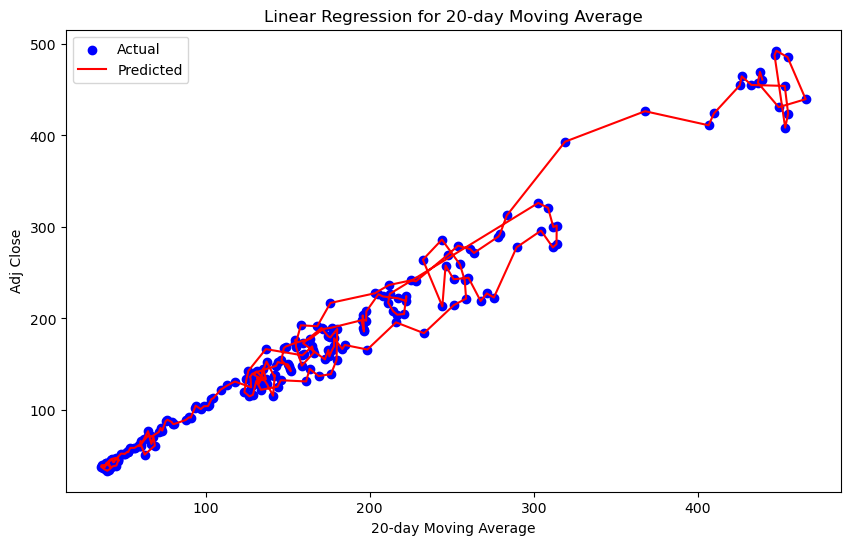

In [70]:
#lR Plot for '20d_ma' as it can only plot 1 feature with the prediction
plt.figure(figsize=(10, 6))
plt.scatter(X_test_20d_sorted, y_test_20d_sorted, color='blue', label='Actual')
plt.plot(X_test_20d_sorted, y_test_20d_sorted, color='red', label='Predicted')
plt.title('Linear Regression for 20-day Moving Average')
plt.xlabel('20-day Moving Average')
plt.ylabel('Adj Close')
plt.legend()
plt.show()


In [71]:
X_test_20d_sorted.shape, y_test_20d_sorted.shape, X_test_20d.shape

((238,), (238,), (238, 4))

In [72]:
#take the last 50 to predict next 30 days of mva20
df21 = df.iloc[-50:].copy()

In [73]:
# Calculate moving averages
df21['20d_ma'] = df21['Close'].rolling(window=20).mean()

In [74]:
# Shift the "Adj Close" column by one day and store it in the same column
df21['Adj Close'] = df21['Adj Close'].shift(-1)

# Drop the last row since there won't be a target value for it after shifting
df21 = df21[:-1]

In [75]:
df21.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-10-19  428.109985  432.970001  418.820007  421.010010  413.814209   
2023-10-20  418.899994  424.700012  410.779999  413.869995  429.692047   
2023-10-23  412.290009  432.480011  409.450012  429.750000  436.571136   
2023-10-24  430.769989  436.970001  426.910004  436.630005  417.733673   
2023-10-25  433.980011  436.500000  415.549988  417.790009  403.205627   

              Volume  Change_ot  20d_ma  
Date                                     
2023-10-19  50123300  -0.016584     NaN  
2023-10-20  47638100  -0.012008     NaN  
2023-10-23  47853000   0.042349     NaN  
2023-10-24  40146300   0.013604     NaN  
2023-10-25  39837900  -0.037306     NaN

In [76]:
df21.shape

(49, 8)

In [77]:
# Drop NaN values resulting from rolling means calculation
df21.dropna(inplace=True)

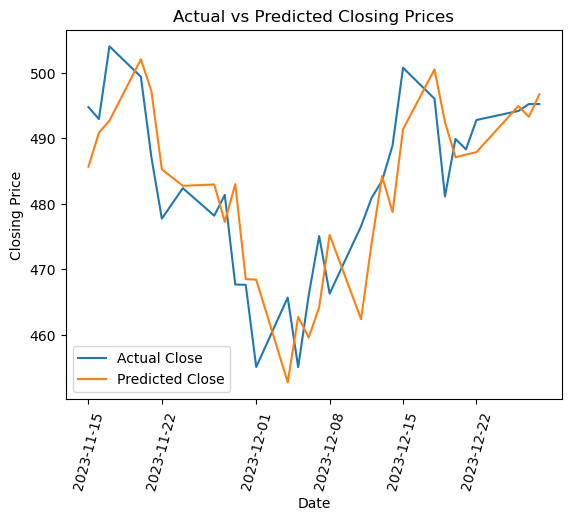

In [78]:
# Plot actual closing prices
plt.plot(df21.index, df21['Adj Close'], label='Actual Close')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=75)

# # Plot predicted closing prices
plt.plot(df21.index,  model_20d.predict(df21[['20d_ma','Open','High', 'Low']]), label='Predicted Close')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')

# Add legend
plt.legend()

# Show plot
plt.show()

In [79]:
df21x = df21['Adj Close']
df21y =model_20d.predict(df21[['20d_ma','Open','High', 'Low']])

In [80]:
# Evaluate the model for '20d_ma'
mse_21d = mean_squared_error(df21x, df21y)
r2_score_21d = r2_score(df21x, df21y)
print("Mean Squared Error (20d_ma):", mse_21d)
print("R^2 Score (20d_ma):", r2_score_21d)

Mean Squared Error (20d_ma): 64.42431296859961
R^2 Score (20d_ma): 0.6247343914264358


In [81]:
y_test_50d

Date
2023-07-14    464.509094
2022-10-05    131.202042
2022-02-16    244.720978
2019-10-02     45.115658
2023-03-30    277.680908
                 ...    
2020-07-14    101.977081
2020-11-23    129.241867
2019-04-01     45.439289
2023-04-25    269.473572
2021-06-17    186.066467
Name: Adj Close, Length: 226, dtype: float64

In [82]:
y_test_50d_sorted = y_test_50d.sort_index()

In [83]:
y_test_50d_sorted

Date
2019-03-19     43.303890
2019-03-28     44.585121
2019-04-01     45.439289
2019-04-16     46.504509
2019-04-26     44.528027
                 ...    
2023-07-19    455.101135
2023-07-26    458.900299
2023-08-21    456.580811
2023-08-24    460.080048
2023-08-31    484.984650
Name: Adj Close, Length: 226, dtype: float64

In [84]:
X_test_50d_sorted = X_test_50d['50d_ma'].sort_index()

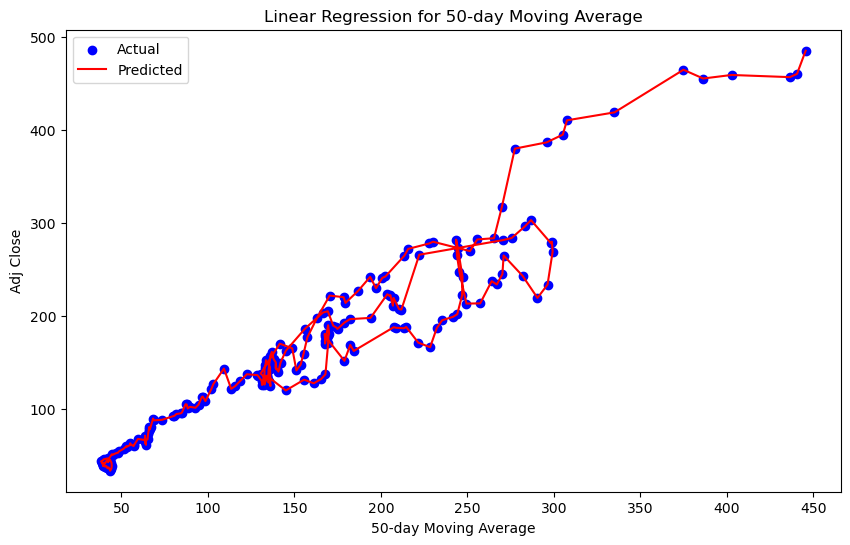

In [85]:
#LR Plot for '50d_ma'
plt.figure(figsize=(10, 6))
plt.scatter(X_test_50d_sorted, y_test_50d_sorted, color='blue', label='Actual')
plt.plot(X_test_50d_sorted, y_test_50d_sorted, color='red', label='Predicted')
plt.title('Linear Regression for 50-day Moving Average')
plt.xlabel('50-day Moving Average')
plt.ylabel('Adj Close')
plt.legend()
plt.show()

In [86]:
#take the last 80 to predict next 30 days of mva50
df51 = df.iloc[-80:].copy()

In [87]:
# Calculate moving averages
df51['50d_ma'] = df51['Close'].rolling(window=50).mean()

In [88]:
# Shift the "Adj Close" column by one day and store it in the same column
df51['Adj Close'] = df51['Adj Close'].shift(-1)

# Drop the last row since there won't be a target value for it after shifting
df51 = df51[:-1]

In [89]:
# Drop NaN values resulting from rolling means calculation
df51.dropna(inplace=True)

In [90]:
df51.shape

(30, 8)

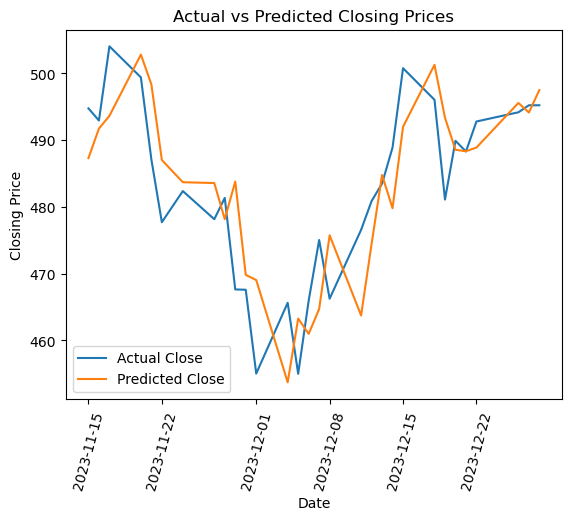

In [91]:
# Plot actual closing prices
plt.plot(df51.index, df51['Adj Close'], label='Actual Close')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=75)

# # Plot predicted closing prices
plt.plot(df51.index,  model_50d.predict(df51[['50d_ma','Open','High', 'Low']]), label='Predicted Close')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Prices')

# Add legend
plt.legend()

# Show plot
plt.show()

In [92]:
df51x = df51['Adj Close']
df51y =model_50d.predict(df51[['50d_ma','Open','High', 'Low']])

In [93]:
# Evaluate the model for '50d_ma'
mse_51d = mean_squared_error(df51x, df51y)
r2_score_51d = r2_score(df51x, df51y)
print("Mean Squared Error (20d_ma):", mse_51d)
print("R^2 Score (20d_ma):", r2_score_51d)

Mean Squared Error (20d_ma): 63.09523027105698
R^2 Score (20d_ma): 0.6324761740602844


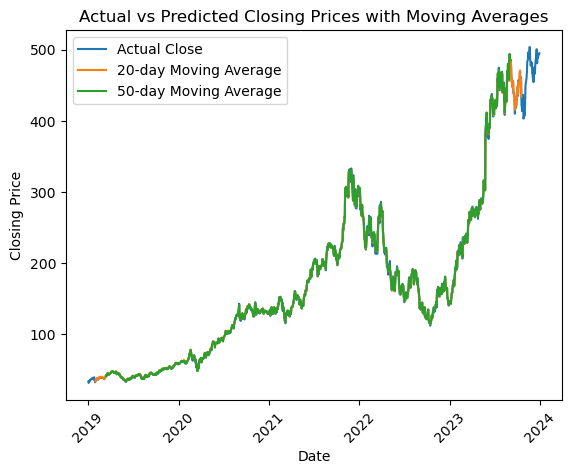

In [94]:
# Plot actual closing prices
plt.plot(df.index, df['Adj Close'], label='Actual Close')

mean_20 = model_20d.predict(df20[['20d_ma','Open','High', 'Low']])
mean_50 = model_50d.predict(df50[['50d_ma','Open','High', 'Low']])

# Plot moving averages
plt.plot(df20.index, mean_20, label='20-day Moving Average')
plt.plot(df50.index, mean_50, label='50-day Moving Average')

plt.title('Actual vs Predicted Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [95]:
#Knearest neighbors

In [96]:
data = yf.download("NVDA", start="2019-01-01", end="2024-01-01")

[*********************100%%**********************]  1 of 1 completed


In [97]:
df = data

In [98]:
knndf= df

In [99]:
knndf.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-01-02  32.660000  34.619999  32.512501  34.055000  33.788895  50875200
2019-01-03  33.447498  33.790001  31.922501  31.997499  31.747469  70555200
2019-01-04  32.735001  34.432499  32.424999  34.047501  33.781448  58562000
2019-01-07  34.625000  36.222500  34.107498  35.849998  35.569870  70916000
2019-01-08  36.672501  36.695000  34.224998  34.957500  34.684334  78601600

In [100]:
knndf['Change_ot'] = ((knndf['Open'] - knndf['Close']) / knndf['Open']) * -1

In [101]:
#setting a target
knndf['Target'] = knndf['Change_ot'].apply(lambda x: 1 if x>0 else 0)

In [102]:
knndf.head()

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2019-01-02  32.660000  34.619999  32.512501  34.055000  33.788895  50875200   
2019-01-03  33.447498  33.790001  31.922501  31.997499  31.747469  70555200   
2019-01-04  32.735001  34.432499  32.424999  34.047501  33.781448  58562000   
2019-01-07  34.625000  36.222500  34.107498  35.849998  35.569870  70916000   
2019-01-08  36.672501  36.695000  34.224998  34.957500  34.684334  78601600   

            Change_ot  Target  
Date                           
2019-01-02   0.042713       1  
2019-01-03  -0.043351       0  
2019-01-04   0.040095       1  
2019-01-07   0.035379       1  
2019-01-08  -0.046765       0

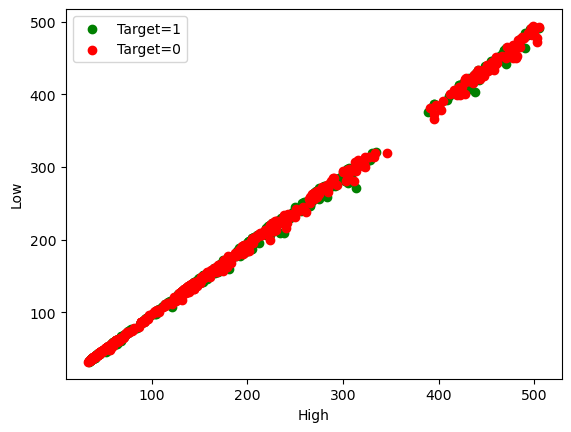

In [103]:
df_target_1 = knndf[knndf['Target'] == 1]
df_target_0 = knndf[knndf['Target'] == 0]

# Plot scatter plot for Target=1 and Target=0
plt.scatter(df_target_1['High'], df_target_1['Low'], color='green', label='Target=1')
plt.scatter(df_target_0['High'], df_target_0['Low'], color='red', label='Target=0')

plt.xlabel('High')
plt.ylabel('Low')
plt.legend()
plt.show()

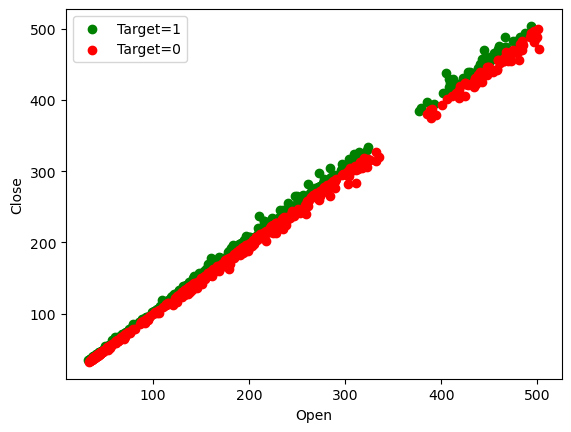

In [104]:
# Plot scatter plot for Target=1 and Target=0
plt.scatter(df_target_1['Open'], df_target_1['Close'], color='green', label='Target=1')
plt.scatter(df_target_0['Open'], df_target_0['Close'], color='red', label='Target=0')

plt.xlabel('Open')
plt.ylabel('Close')
plt.legend()
plt.show()

In [105]:
#code in Shifting target to 1 day after
#y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [106]:
#this code uses the shifted y as the "target" instead of the target column
X = knndf.drop(['Adj Close','Volume', 'Target','Change_ot'], axis=1)
y = np.where(knndf['Change_ot'].shift(-1) > knndf['Change_ot'], 1, 0)

In [107]:
X.head(1)

Open       High        Low   Close
Date                                           
2019-01-02  32.66  34.619999  32.512501  34.055

In [108]:
y

array([0, 1, 0, ..., 0, 0, 0])

In [109]:
# Drop the last row
X = X.iloc[:-1]
y = y[:-1]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [114]:
knn = KNeighborsClassifier(n_neighbors=3)

In [115]:
# Define the StratifiedKFold cross-validation iterator
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Perform cross-validation and obtain scores
cross_val_scores = cross_val_score(knn, X_train, y_train, cv=folds)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Print the mean cross-validation score
print("Mean cross-validation score:", cross_val_scores.mean())

Cross-validation scores: [0.55445545 0.63366337 0.68316832 0.67326733 0.59405941 0.56
 0.61       0.66       0.62       0.66      ]
Mean cross-validation score: 0.6248613861386139


In [116]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5952380952380952

In [117]:
y_pred = knn.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
cm

array([[84, 43],
       [59, 66]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

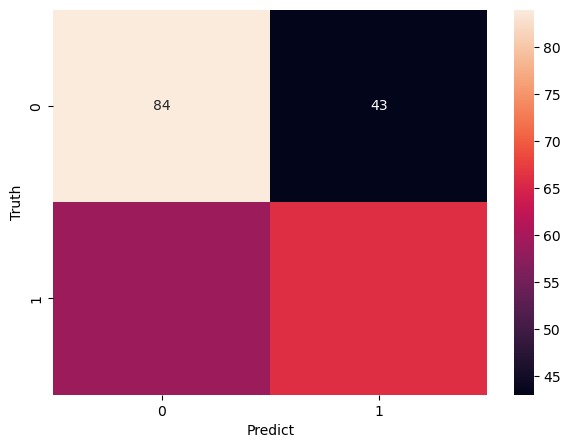

In [118]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.66      0.62       127
           1       0.61      0.53      0.56       125

    accuracy                           0.60       252
   macro avg       0.60      0.59      0.59       252
weighted avg       0.60      0.60      0.59       252



In [120]:
data2 = yf.download("NVDA", start="2024-01-02", end="2024-02-14")

[*********************100%%**********************]  1 of 1 completed


In [121]:
knndf2= data2

In [122]:
#predict the next 30 days
knndf2.shape

(30, 6)

In [123]:
knndf2['Change_ot'] = ((knndf2['Open'] - knndf2['Close']) / knndf2['Open']) * -1

In [124]:
knndf2.head(1)

Open        High         Low       Close  Adj Close  \
Date                                                                    
2024-01-02  492.440002  492.950012  475.950012  481.679993  481.65741   

              Volume  Change_ot  
Date                             
2024-01-02  41125400   -0.02185

In [125]:
#this code uses the shifted y as the "target" instead of the target column
X1 = knndf2.drop(['Adj Close','Volume','Change_ot'], axis=1)
y1 = np.where(knndf2['Change_ot'].shift(-1) > knndf2['Change_ot'], 1, 0)

In [126]:
# Drop the last row
X1 = X1.iloc[:-1]
y1 = y1[:-1]

In [127]:
y1

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1])

In [128]:
y_pred1 = knn.predict(X1)
cm1= confusion_matrix(y1, y_pred1)
cm1

array([[11,  0],
       [15,  3]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

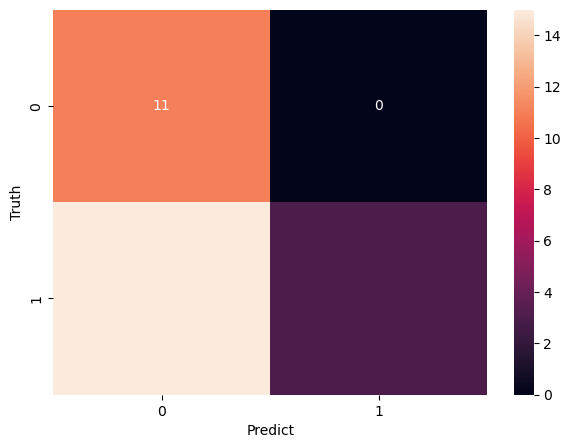

In [129]:
plt.figure(figsize=(7,5))
sns.heatmap(cm1, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')

In [130]:
# Evaluate the performance of the model on the new data
accuracy_new = accuracy_score(y1, y_pred1)
print("Accuracy on new data:", accuracy_new)

Accuracy on new data: 0.4827586206896552


In [131]:
print(classification_report(y1, y_pred1))

              precision    recall  f1-score   support

           0       0.42      1.00      0.59        11
           1       1.00      0.17      0.29        18

    accuracy                           0.48        29
   macro avg       0.71      0.58      0.44        29
weighted avg       0.78      0.48      0.40        29



In [132]:
#SupportVector machine

In [133]:
data = yf.download("NVDA", start="2019-01-01", end="2024-01-01")

[*********************100%%**********************]  1 of 1 completed


In [134]:
svmdf = data

In [135]:
svmdf.head(1)

Open       High        Low   Close  Adj Close    Volume
Date                                                                
2019-01-02  32.66  34.619999  32.512501  34.055  33.788895  50875200

In [136]:
svmdf['Change_ot'] = ((svmdf['Open'] - svmdf['Close']) / svmdf['Open']) * -1

In [137]:
# df = df.drop(['20d_ma','50d_ma'], axis=1)
# df.head()

In [138]:
#setting a target
svmdf['Target'] = svmdf['Change_ot'].apply(lambda x: 1 if x>0 else 0)
svmdf.head()

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2019-01-02  32.660000  34.619999  32.512501  34.055000  33.788895  50875200   
2019-01-03  33.447498  33.790001  31.922501  31.997499  31.747469  70555200   
2019-01-04  32.735001  34.432499  32.424999  34.047501  33.781448  58562000   
2019-01-07  34.625000  36.222500  34.107498  35.849998  35.569870  70916000   
2019-01-08  36.672501  36.695000  34.224998  34.957500  34.684334  78601600   

            Change_ot  Target  
Date                           
2019-01-02   0.042713       1  
2019-01-03  -0.043351       0  
2019-01-04   0.040095       1  
2019-01-07   0.035379       1  
2019-01-08  -0.046765       0

In [139]:
# Shift the "Target" column by one day to get the target for the next day
y = svmdf['Target'].shift(-1)

# Drop the last row since there won't be a target value for it after shifting
y = y[:-1]

# Drop the columns 'Adj Close', 'Volume', and 'Change_ot' from the features
X = svmdf.drop(['Adj Close', 'Volume', 'Change_ot','Target'], axis=1)[:-1]

In [140]:
X.head()

Open       High        Low      Close
Date                                                  
2019-01-02  32.660000  34.619999  32.512501  34.055000
2019-01-03  33.447498  33.790001  31.922501  31.997499
2019-01-04  32.735001  34.432499  32.424999  34.047501
2019-01-07  34.625000  36.222500  34.107498  35.849998
2019-01-08  36.672501  36.695000  34.224998  34.957500

In [141]:
y.head()

Date
2019-01-02    0.0
2019-01-03    1.0
2019-01-04    1.0
2019-01-07    0.0
2019-01-08    1.0
Name: Target, dtype: float64

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [143]:
svm = SVC()


In [144]:
# Define the ShuffleSplit cross-validation iterator
shufflesplit = ShuffleSplit(n_splits=10, test_size=0.2, random_state=1)


# Perform cross-validation and obtain scores
cross_val_scores = cross_val_score(svm, X_train, y_train, cv=shufflesplit)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Print the mean cross-validation score
print("Mean cross-validation score:", cross_val_scores.mean())

Cross-validation scores: [0.49751244 0.45771144 0.43283582 0.46268657 0.44776119 0.47761194
 0.50248756 0.44776119 0.46766169 0.45771144]
Mean cross-validation score: 0.4651741293532338


In [145]:
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.5396825396825397

In [146]:
y_pred = svm.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
cm

array([[  5, 114],
       [  2, 131]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

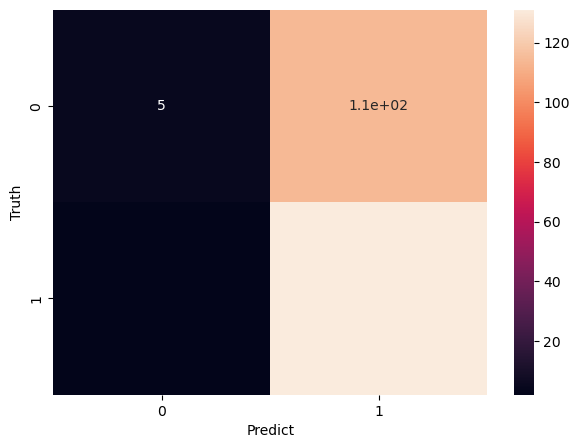

In [147]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')

In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.04      0.08       119
         1.0       0.53      0.98      0.69       133

    accuracy                           0.54       252
   macro avg       0.62      0.51      0.39       252
weighted avg       0.62      0.54      0.40       252



In [149]:
data2 = yf.download("NVDA", start="2024-01-02", end="2024-02-14")

[*********************100%%**********************]  1 of 1 completed


In [150]:
svmdf2 = data2

In [151]:
#predict the next 30 days
svmdf2.shape

(30, 6)

In [152]:
svmdf2.head(1)

Open        High         Low       Close  Adj Close  \
Date                                                                    
2024-01-02  492.440002  492.950012  475.950012  481.679993  481.65741   

              Volume  
Date                  
2024-01-02  41125400

In [153]:
svmdf2['Change_ot'] = ((svmdf2['Open'] - svmdf2['Close']) / svmdf2['Open']) * -1

In [154]:
#setting a target
svmdf2['Target'] = svmdf2['Change_ot'].apply(lambda x: 1 if x>0 else 0)
svmdf2.head(1)

Open        High         Low       Close  Adj Close  \
Date                                                                    
2024-01-02  492.440002  492.950012  475.950012  481.679993  481.65741   

              Volume  Change_ot  Target  
Date                                     
2024-01-02  41125400   -0.02185       0

In [155]:
# Shift the "Target" column by one day to get the target for the next day
y2 = svmdf2['Target'].shift(-1)

# Drop the last row since there won't be a target value for it after shifting
y2 = y2[:-1]

# Drop the columns 'Adj Close', 'Volume', and 'Change_ot' from the features
X2 = svmdf2.drop(['Adj Close', 'Volume', 'Change_ot','Target'], axis=1)[:-1]

In [156]:
y_pred2 = svm.predict(X2)
cm2= confusion_matrix(y2, y_pred2)
cm2

array([[ 8,  1],
       [18,  2]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

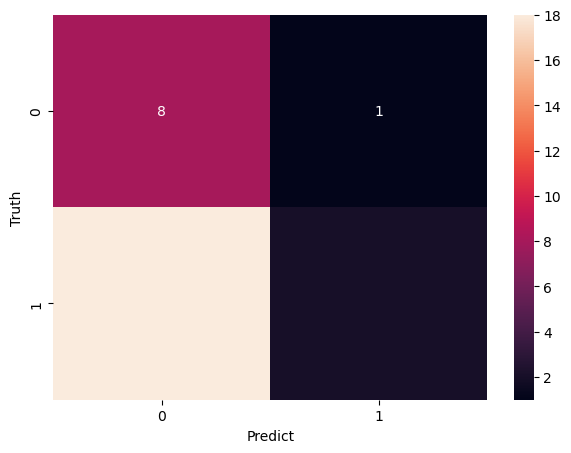

In [157]:
plt.figure(figsize=(7,5))
sns.heatmap(cm2, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')

In [158]:
# Evaluate the performance of the model on the new data
accuracy_new = accuracy_score(y2, y_pred2)
print("Accuracy on new data:", accuracy_new)

Accuracy on new data: 0.3448275862068966


In [159]:
print(classification_report(y2, y_pred2))

              precision    recall  f1-score   support

         0.0       0.31      0.89      0.46         9
         1.0       0.67      0.10      0.17        20

    accuracy                           0.34        29
   macro avg       0.49      0.49      0.32        29
weighted avg       0.56      0.34      0.26        29



In [160]:
#random forest

In [161]:
data = yf.download("NVDA", start="2019-01-01", end="2024-01-01")

[*********************100%%**********************]  1 of 1 completed


In [162]:
rfdf = data

In [163]:
rfdf.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-01-02  32.660000  34.619999  32.512501  34.055000  33.788895  50875200
2019-01-03  33.447498  33.790001  31.922501  31.997499  31.747469  70555200
2019-01-04  32.735001  34.432499  32.424999  34.047501  33.781448  58562000
2019-01-07  34.625000  36.222500  34.107498  35.849998  35.569870  70916000
2019-01-08  36.672501  36.695000  34.224998  34.957500  34.684334  78601600

In [164]:
rfdf['Change_ot'] = ((rfdf['Open'] - rfdf['Close']) / rfdf['Open']) * -1

In [165]:
#setting a target
rfdf['Target'] = rfdf['Change_ot'].apply(lambda x: 1 if x>0 else 0)
rfdf.head()

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2019-01-02  32.660000  34.619999  32.512501  34.055000  33.788895  50875200   
2019-01-03  33.447498  33.790001  31.922501  31.997499  31.747469  70555200   
2019-01-04  32.735001  34.432499  32.424999  34.047501  33.781448  58562000   
2019-01-07  34.625000  36.222500  34.107498  35.849998  35.569870  70916000   
2019-01-08  36.672501  36.695000  34.224998  34.957500  34.684334  78601600   

            Change_ot  Target  
Date                           
2019-01-02   0.042713       1  
2019-01-03  -0.043351       0  
2019-01-04   0.040095       1  
2019-01-07   0.035379       1  
2019-01-08  -0.046765       0

In [166]:
# Shift the "Target" column by one day to get the target for the next day
y = rfdf['Target'].shift(-1)

# Drop the last row since there won't be a target value for it after shifting
y = y[:-1]

# Drop the columns 'Adj Close', 'Volume', and 'Change_ot' from the features
X = rfdf.drop(['Adj Close', 'Volume', 'Change_ot', 'Target'], axis=1)[:-1]

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [168]:
rf = RandomForestClassifier(n_estimators=40)

In [169]:
#cross-validation

# Define the StratifiedKFold cross-validation iterator
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Perform cross-validation and obtain scores
cross_val_scores = cross_val_score(rf, X_train, y_train, cv=folds)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Print the mean cross-validation score
print("Mean cross-validation score:", cross_val_scores.mean())

Cross-validation scores: [0.62376238 0.4950495  0.4950495  0.38613861 0.47524752 0.54
 0.5        0.54       0.55       0.54      ]
Mean cross-validation score: 0.5145247524752475


In [170]:
rf.fit(X_train,y_train)
rf.score(X_test, y_test)

0.5198412698412699

In [171]:
y_pred = rf.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
cm

array([[63, 56],
       [65, 68]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

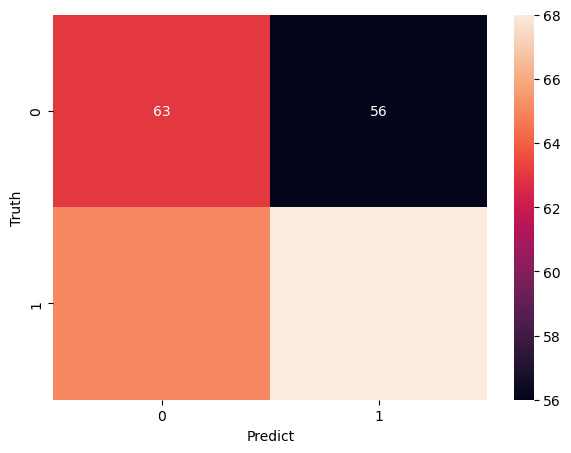

In [172]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')

In [173]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.49      0.53      0.51       119
         1.0       0.55      0.51      0.53       133

    accuracy                           0.52       252
   macro avg       0.52      0.52      0.52       252
weighted avg       0.52      0.52      0.52       252



In [174]:
data2 = yf.download("NVDA", start="2024-01-02", end="2024-02-14")

[*********************100%%**********************]  1 of 1 completed


In [175]:
rfdf2 = data2

In [176]:
rfdf2.shape

(30, 6)

In [177]:
rfdf2['Change_ot'] = ((rfdf2['Open'] - rfdf2['Close']) / rfdf2['Open']) * -1

In [178]:
#setting a target
rfdf2['Target'] = rfdf2['Change_ot'].apply(lambda x: 1 if x>0 else 0)
rfdf2.head(1)

Open        High         Low       Close  Adj Close  \
Date                                                                    
2024-01-02  492.440002  492.950012  475.950012  481.679993  481.65741   

              Volume  Change_ot  Target  
Date                                     
2024-01-02  41125400   -0.02185       0

In [179]:
rfdf2.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  492.440002  492.950012  475.950012  481.679993  481.657410   
2024-01-03  474.850006  481.839996  473.200012  475.690002  475.667694   
2024-01-04  477.670013  485.000000  475.079987  479.980011  479.957489   
2024-01-05  484.619995  495.470001  483.059998  490.970001  490.946960   
2024-01-08  495.119995  522.750000  494.790009  522.530029  522.505493   

              Volume  Change_ot  Target  
Date                                     
2024-01-02  41125400  -0.021850       0  
2024-01-03  32089600   0.001769       1  
2024-01-04  30653500   0.004836       1  
2024-01-05  41456800   0.013103       1  
2024-01-08  64251000   0.055360       1

In [180]:
# Shift the "Target" column by one day to get the target for the next day
y3 = rfdf2['Target'].shift(-1)

# Drop the last row since there won't be a target value for it after shifting
y3 = y3[:-1]

# Drop the columns 'Adj Close', 'Volume', and 'Change_ot' from the features
X3 = rfdf2.drop(['Adj Close', 'Volume', 'Change_ot', 'Target'], axis=1)[:-1]

In [181]:
y3.shape

(29,)

In [182]:
y_pred3 = rf.predict(X3)
cm3= confusion_matrix(y3, y_pred3)
cm3

array([[ 9,  0],
       [19,  1]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

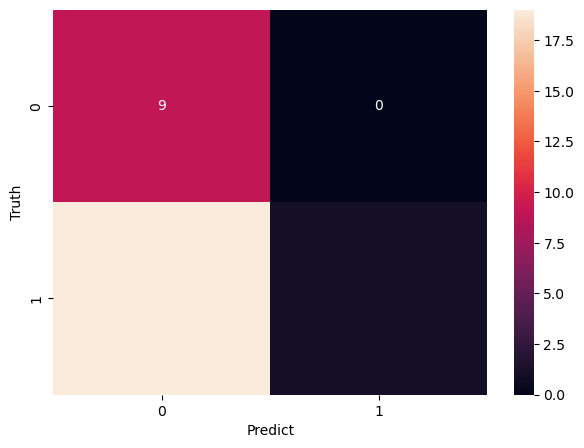

In [183]:
plt.figure(figsize=(7,5))
sns.heatmap(cm3, annot=True)
plt.xlabel('Predict')
plt.ylabel('Truth')

In [184]:
# Evaluate the performance of the model on the new data
accuracy_new = accuracy_score(y3, y_pred3)
print("Accuracy on new data:", accuracy_new)

Accuracy on new data: 0.3448275862068966


In [185]:
print(classification_report(y3, y_pred3))

              precision    recall  f1-score   support

         0.0       0.32      1.00      0.49         9
         1.0       1.00      0.05      0.10        20

    accuracy                           0.34        29
   macro avg       0.66      0.53      0.29        29
weighted avg       0.79      0.34      0.22        29



In [186]:
#longshort-term 

In [187]:
data = yf.download("NVDA", start="2019-01-01", end="2024-01-01")

[*********************100%%**********************]  1 of 1 completed


In [188]:
df = data

In [189]:
df.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-01-02  32.660000  34.619999  32.512501  34.055000  33.788895  50875200
2019-01-03  33.447498  33.790001  31.922501  31.997499  31.747469  70555200
2019-01-04  32.735001  34.432499  32.424999  34.047501  33.781448  58562000
2019-01-07  34.625000  36.222500  34.107498  35.849998  35.569870  70916000
2019-01-08  36.672501  36.695000  34.224998  34.957500  34.684334  78601600

In [190]:
df = df.drop(['Volume'], axis=1)
df.head()

Open       High        Low      Close  Adj Close
Date                                                             
2019-01-02  32.660000  34.619999  32.512501  34.055000  33.788895
2019-01-03  33.447498  33.790001  31.922501  31.997499  31.747469
2019-01-04  32.735001  34.432499  32.424999  34.047501  33.781448
2019-01-07  34.625000  36.222500  34.107498  35.849998  35.569870
2019-01-08  36.672501  36.695000  34.224998  34.957500  34.684334

In [191]:
# Shift 'Adj Close' column by one day ahead = this will be the target
df['Adj Close'] = df['Adj Close'].shift(-1)

# Drop the last row
df.drop(df.tail(1).index, inplace=True)

In [192]:
df.isna()

Open   High    Low  Close  Adj Close
Date                                             
2019-01-02  False  False  False  False      False
2019-01-03  False  False  False  False      False
2019-01-04  False  False  False  False      False
2019-01-07  False  False  False  False      False
2019-01-08  False  False  False  False      False
...           ...    ...    ...    ...        ...
2023-12-21  False  False  False  False      False
2023-12-22  False  False  False  False      False
2023-12-26  False  False  False  False      False
2023-12-27  False  False  False  False      False
2023-12-28  False  False  False  False      False

[1257 rows x 5 columns]

In [193]:
df.iloc[-1]

Open         496.429993
High         498.839996
Low          494.119995
Close        495.220001
Adj Close    495.196777
Name: 2023-12-28 00:00:00, dtype: float64

In [194]:
df.head()

Open       High        Low      Close  Adj Close
Date                                                             
2019-01-02  32.660000  34.619999  32.512501  34.055000  31.747469
2019-01-03  33.447498  33.790001  31.922501  31.997499  33.781448
2019-01-04  32.735001  34.432499  32.424999  34.047501  35.569870
2019-01-07  34.625000  36.222500  34.107498  35.849998  34.684334
2019-01-08  36.672501  36.695000  34.224998  34.957500  35.366470

In [195]:
df.shape

(1257, 5)

In [196]:
print("Null Value present: ", df.isnull().values.any())

Null Value present:  False


In [197]:
print("Dataframe Shape: ", df.shape)

Dataframe Shape:  (1257, 5)


<Axes: xlabel='Date'>

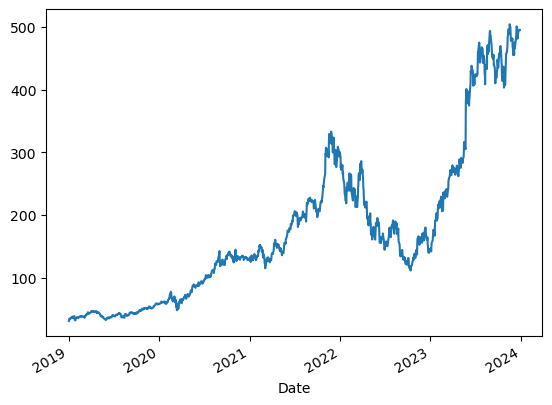

In [198]:
df['Adj Close'].plot()

In [199]:
features = ['Open', 'High', 'Low', 'Close']

In [200]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, 
                                index=df.index)
feature_transform.head()

Open      High       Low     Close
Date                                              
2019-01-02  0.000000  0.001760  0.001277  0.004358
2019-01-03  0.001677  0.000000  0.000000  0.000000
2019-01-04  0.000160  0.001362  0.001087  0.004342
2019-01-07  0.004185  0.005157  0.004727  0.008160
2019-01-08  0.008546  0.006159  0.004982  0.006270

In [201]:
print(feature_transform)

                Open      High       Low     Close
Date                                              
2019-01-02  0.000000  0.001760  0.001277  0.004358
2019-01-03  0.001677  0.000000  0.000000  0.000000
2019-01-04  0.000160  0.001362  0.001087  0.004342
2019-01-07  0.004185  0.005157  0.004727  0.008160
2019-01-08  0.008546  0.006159  0.004982  0.006270
...              ...       ...       ...       ...
2023-12-21  0.970075  0.969196  0.978516  0.969942
2023-12-22  0.978253  0.975302  0.979554  0.966553
2023-12-26  0.973419  0.979902  0.990221  0.976064
2023-12-27  0.984984  0.981598  0.992925  0.978987
2023-12-28  0.987796  0.985923  1.000000  0.981211

[1257 rows x 4 columns]


In [202]:
output_var = pd.DataFrame(df['Adj Close'])
output_var.shape

(1257, 1)

In [203]:
output_var.head()

Adj Close
Date                 
2019-01-02  31.747469
2019-01-03  33.781448
2019-01-04  35.569870
2019-01-07  34.684334
2019-01-08  35.366470

In [204]:
df['Adj Close']

Date
2019-01-02     31.747469
2019-01-03     33.781448
2019-01-04     35.569870
2019-01-07     34.684334
2019-01-08     35.366470
                 ...    
2023-12-21    488.277069
2023-12-22    492.766907
2023-12-26    494.146820
2023-12-27    495.196777
2023-12-28    495.196777
Name: Adj Close, Length: 1257, dtype: float64

In [205]:
output_var.shape

(1257, 1)

In [206]:
# Scaling target data
scaler = MinMaxScaler()
output_var['Adj Close'] = scaler.fit_transform(output_var[['Adj Close']])

# Reassigning the scaled data to the 'Adj Close' column
output_var = pd.DataFrame(data=output_var['Adj Close'], index=output_var.index, columns=['Adj Close'])

# Displaying the first 5 rows
output_var.head()                                     
                    

Adj Close
Date                 
2019-01-02   0.000000
2019-01-03   0.004307
2019-01-04   0.008094
2019-01-07   0.006219
2019-01-08   0.007663

In [207]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [208]:
X_train.shape

(1143, 4)

In [209]:
X_train

Open      High       Low     Close
Date                                              
2019-01-02  0.000000  0.001760  0.001277  0.004358
2019-01-03  0.001677  0.000000  0.000000  0.000000
2019-01-04  0.000160  0.001362  0.001087  0.004342
2019-01-07  0.004185  0.005157  0.004727  0.008160
2019-01-08  0.008546  0.006159  0.004982  0.006270
...              ...       ...       ...       ...
2023-07-12  0.847007  0.859802  0.856447  0.862167
2023-07-13  0.878637  0.906867  0.893552  0.906120
2023-07-14  0.922620  0.947847  0.905841  0.895360
2023-07-17  0.916358  0.914096  0.910212  0.916372
2023-07-18  0.925133  0.943777  0.920424  0.938254

[1143 rows x 4 columns]

In [210]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)

In [211]:
trainX.shape

(1143, 4)

In [212]:
trainX

array([[0.00000000e+00, 1.75962602e-03, 1.27651093e-03, 4.35825787e-03],
       [1.67731303e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.59746033e-04, 1.36211919e-03, 1.08719461e-03, 4.34237180e-03],
       ...,
       [9.22619773e-01, 9.47847091e-01, 9.05841140e-01, 8.95359502e-01],
       [9.16357852e-01, 9.14096083e-01, 9.10211543e-01, 9.16372297e-01],
       [9.25133134e-01, 9.43776593e-01, 9.20423630e-01, 9.38253639e-01]])

In [213]:
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [214]:
X_train.shape

(1143, 1, 4)

In [215]:
X_train

array([[[0.00000000e+00, 1.75962602e-03, 1.27651093e-03, 4.35825787e-03]],

       [[1.67731303e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[1.59746033e-04, 1.36211919e-03, 1.08719461e-03, 4.34237180e-03]],

       ...,

       [[9.22619773e-01, 9.47847091e-01, 9.05841140e-01, 8.95359502e-01]],

       [[9.16357852e-01, 9.14096083e-01, 9.10211543e-01, 9.16372297e-01]],

       [[9.25133134e-01, 9.43776593e-01, 9.20423630e-01, 9.38253639e-01]]])

In [216]:
train_size = len(X_train)
test_size = len(X_test)

print("Training size:", train_size)
print("Test size:", test_size)

Training size: 1143
Test size: 114


In [217]:
X_test.shape

(114, 1, 4)

In [218]:
y_test.shape

(114,)

In [219]:
y_test

array([0.89641429, 0.87077801, 0.87719234, 0.89978025, 0.89497472,
       0.90445868, 0.92245274, 0.9220083 , 0.91730861, 0.86993125,
       0.8751389 , 0.87863185, 0.89423387, 0.87829312, 0.83362546,
       0.83011132, 0.7976584 , 0.85900772, 0.86296643, 0.85335543,
       0.85034939, 0.84939672, 0.92704659, 0.89954737, 0.93020087,
       0.93119579, 0.9069567 , 0.92425224, 0.9655116 , 0.97567302,
       0.97759936, 0.95969001, 0.9605157 , 0.92911857, 0.91175816,
       0.8975946 , 0.88925316, 0.88273233, 0.89575272, 0.8977851 ,
       0.86219618, 0.86359349, 0.85415114, 0.82703078, 0.80115948,
       0.81371398, 0.82667085, 0.82008657, 0.83187896, 0.84502639,
       0.8537065 , 0.88086932, 0.85408762, 0.86518135, 0.87887921,
       0.90161716, 0.8912644 , 0.90237933, 0.92371997, 0.92666276,
       0.8952445 , 0.90866714, 0.86300075, 0.8261203 , 0.82410912,
       0.80899284, 0.84261277, 0.85717864, 0.81729196, 0.7865301 ,
       0.79021386, 0.80420805, 0.79614181, 0.82885146, 0.85385

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



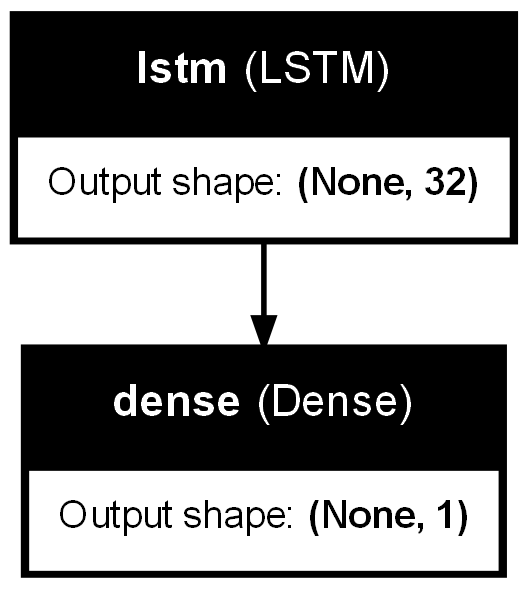

In [220]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), 
              activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [221]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8,
                 verbose=1, shuffle=False)

Epoch 1/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0010    
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0119
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Epoch 9/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0011
Epoch 10/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6529e-04
Epoch 11/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4836e-04
Epoch 12/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3761e-04
Epoch 13/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.3536e-04
Epoch 14/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.4261e-04
Epoch 15/100
143/14

In [224]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [225]:
y_pred

array([[0.94391775],
       [0.91641676],
       [0.8936893 ],
       [0.8895389 ],
       [0.90882754],
       [0.90722024],
       [0.924799  ],
       [0.9335858 ],
       [0.9348089 ],
       [0.9285893 ],
       [0.889409  ],
       [0.8853231 ],
       [0.8952962 ],
       [0.9019089 ],
       [0.8909943 ],
       [0.8575087 ],
       [0.8458095 ],
       [0.8180863 ],
       [0.8453467 ],
       [0.8827546 ],
       [0.8743747 ],
       [0.8666238 ],
       [0.8532273 ],
       [0.9187122 ],
       [0.9282376 ],
       [0.9291432 ],
       [0.9650715 ],
       [0.9249259 ],
       [0.9254269 ],
       [0.9602519 ],
       [0.98466146],
       [0.98812485],
       [0.9779723 ],
       [0.968684  ],
       [0.94871324],
       [0.91674155],
       [0.91429234],
       [0.9041183 ],
       [0.89716256],
       [0.9029048 ],
       [0.9105163 ],
       [0.88644636],
       [0.8640725 ],
       [0.86722535],
       [0.8518501 ],
       [0.821289  ],
       [0.8274367 ],
       [0.834

In [226]:
y_test

array([0.89641429, 0.87077801, 0.87719234, 0.89978025, 0.89497472,
       0.90445868, 0.92245274, 0.9220083 , 0.91730861, 0.86993125,
       0.8751389 , 0.87863185, 0.89423387, 0.87829312, 0.83362546,
       0.83011132, 0.7976584 , 0.85900772, 0.86296643, 0.85335543,
       0.85034939, 0.84939672, 0.92704659, 0.89954737, 0.93020087,
       0.93119579, 0.9069567 , 0.92425224, 0.9655116 , 0.97567302,
       0.97759936, 0.95969001, 0.9605157 , 0.92911857, 0.91175816,
       0.8975946 , 0.88925316, 0.88273233, 0.89575272, 0.8977851 ,
       0.86219618, 0.86359349, 0.85415114, 0.82703078, 0.80115948,
       0.81371398, 0.82667085, 0.82008657, 0.83187896, 0.84502639,
       0.8537065 , 0.88086932, 0.85408762, 0.86518135, 0.87887921,
       0.90161716, 0.8912644 , 0.90237933, 0.92371997, 0.92666276,
       0.8952445 , 0.90866714, 0.86300075, 0.8261203 , 0.82410912,
       0.80899284, 0.84261277, 0.85717864, 0.81729196, 0.7865301 ,
       0.79021386, 0.80420805, 0.79614181, 0.82885146, 0.85385

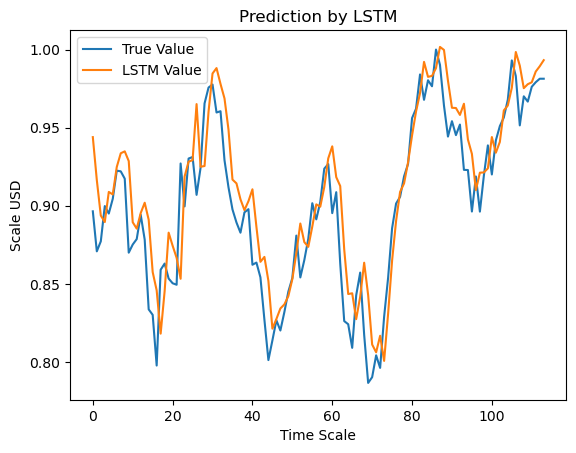

In [227]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scale USD')
plt.legend()
plt.show()

In [228]:
#### Calculate the metrics RMSE and MAPE ####
def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)
    """
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return rmse


def calculate_mape(y_true, y_pred):
    """
    Calculate the Mean Absolute Percentage Error (MAPE) %
    """
    y_pred, y_true = np.array(y_pred), np.array(y_true)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

In [229]:
def calculate_perf_metrics(var):
    ### RMSE
    rmse = calculate_rmse(
        np.array(stockprices[train_size:]["Close"]),
        np.array(stockprices[train_size:][var]),
    )
    ### MAPE
    mape = calculate_mape(
        np.array(stockprices[train_size:]["Close"]),
        np.array(stockprices[train_size:][var]),
    )

    ## Log to Neptune
    run["RMSE"] = rmse
    run["MAPE (%)"] = mape

    return rmse, mape

In [230]:
y_test.shape

(114,)

In [231]:
y_pred.shape

(114, 1)

In [232]:
calculate_rmse(y_test, y_pred)

0.07615655090077654

In [233]:
calculate_mape(y_test, y_pred)

6.963869015113186

In [234]:
df.shape

(1257, 5)

In [235]:
data2 = yf.download("NVDA", start="2024-01-02", end="2024-02-14")

[*********************100%%**********************]  1 of 1 completed


In [236]:
dflstm2 = data2
dflstm2.shape

(30, 6)

In [237]:
# Shift the "Adj Close" column by one day and store it in the same column
dflstm2['Adj Close'] = dflstm2['Adj Close'].shift(-1)

# Drop the last row since there won't be a target value for it after shifting
dflstm2 = dflstm2[:-1]

In [238]:
dfXlstm = dflstm2.drop(['Volume','Adj Close'], axis=1)

In [239]:
dfXlstm

Open        High         Low       Close
Date                                                      
2024-01-02  492.440002  492.950012  475.950012  481.679993
2024-01-03  474.850006  481.839996  473.200012  475.690002
2024-01-04  477.670013  485.000000  475.079987  479.980011
2024-01-05  484.619995  495.470001  483.059998  490.970001
2024-01-08  495.119995  522.750000  494.790009  522.530029
2024-01-09  524.010010  543.250000  516.900024  531.400024
2024-01-10  536.159973  546.000000  534.890015  543.500000
2024-01-11  549.989990  553.460022  535.599976  548.219971
2024-01-12  546.200012  549.700012  543.299988  547.099976
2024-01-16  550.179993  568.349976  549.000000  563.820007
2024-01-17  563.469971  564.710022  547.400024  560.530029
2024-01-18  572.599976  576.000000  561.070007  571.070007
2024-01-19  579.890015  595.000000  572.250000  594.909973
2024-01-22  600.489990  603.309998  590.700012  596.539978
2024-01-23  595.700012  599.099976  585.849976  598.729980
2024-01-24  603.039978  628.489990  599.380005  613.619995
2024-01-25  623.500000  627.190002  608.500000  616.169983
2024-01-26  609.599976  617.830017  605.729980  610.309998
2024-01-29  612.320007  624.890015  609.070007  624.650024
2024-01-30  629.000000  634.929993  622.599976  627.739990
2024-01-31  614.400024  622.690002  607.000000  615.270020
2024-02-01  621.000000  631.909973  616.500000  630.270020
2024-02-02  639.739990  666.000000  636.900024  661.599976
2024-02-05  682.250000  694.969971  672.049988  693.320007
2024-02-06  696.299988  697.539978  663.000000  682.229980
2024-02-07  683.190002  702.200012  676.000000  700.989990
2024-02-08  700.739990  707.940002  694.549988  696.409973
2024-02-09  705.330017  721.849976  702.119995  721.330017
2024-02-12  726.000000  746.109985  712.500000  722.479980

In [240]:
dfXlstm.shape

(29, 4)

In [241]:
dfXlstm.head(1)

Open        High         Low       Close
Date                                                      
2024-01-02  492.440002  492.950012  475.950012  481.679993

In [242]:
dfXfeatures = ['Open', 'High', 'Low', 'Close']

In [243]:
#Scaling
scaler = MinMaxScaler()
dfXfeature_transform = scaler.fit_transform(dfXlstm[dfXfeatures])
dfXfeature_transform= pd.DataFrame(columns=features, data=dfXfeature_transform, index=dfXlstm.index)
dfXfeature_transform.head()

Open      High       Low     Close
Date                                              
2024-01-02  0.070038  0.042040  0.011492  0.024272
2024-01-03  0.000000  0.000000  0.000000  0.000000
2024-01-04  0.011228  0.011957  0.007856  0.017383
2024-01-05  0.038901  0.051576  0.041203  0.061915
2024-01-08  0.080709  0.154804  0.090221  0.189797

In [244]:
dfXfeature_transform.shape

(29, 4)

In [245]:
#Process the data for LSTM
trainZ =np.array(dfXfeature_transform)

In [246]:
trainZ.shape

(29, 4)

In [247]:
Z_train = trainZ.reshape(dfXfeature_transform.shape[0], 1, dfXfeature_transform.shape[1])

In [248]:
trainZ

array([[0.07003781, 0.0420404 , 0.01149185, 0.02427161],
       [0.        , 0.        , 0.        , 0.        ],
       [0.01122838, 0.01195748, 0.00785614, 0.01738324],
       [0.03890101, 0.05157606, 0.04120345, 0.06191499],
       [0.0807087 , 0.15480382, 0.09022147, 0.18979712],
       [0.19573962, 0.232376  , 0.18261602, 0.22573859],
       [0.24411694, 0.24278203, 0.25779359, 0.27476804],
       [0.2991837 , 0.27101082, 0.26076041, 0.29389349],
       [0.2840932 , 0.25678291, 0.29293765, 0.28935524],
       [0.29994023, 0.32735453, 0.31675717, 0.35710528],
       [0.35285673, 0.31358092, 0.31007111, 0.3437742 ],
       [0.38920952, 0.3563023 , 0.36719599, 0.38648249],
       [0.41823616, 0.42819847, 0.41391556, 0.48308271],
       [0.50025876, 0.45964357, 0.49101549, 0.48968753],
       [0.48118658, 0.44371281, 0.47074789, 0.49856149],
       [0.510412  , 0.55492489, 0.52728792, 0.55889625],
       [0.59187735, 0.55000572, 0.56539906, 0.56922887],
       [0.53653184, 0.51458745,

In [249]:
Z_train.shape

(29, 1, 4)

In [250]:
dflstm2.shape

(29, 6)

In [251]:
dflstm2.head(5)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  492.440002  492.950012  475.950012  481.679993  475.667694   
2024-01-03  474.850006  481.839996  473.200012  475.690002  479.957489   
2024-01-04  477.670013  485.000000  475.079987  479.980011  490.946960   
2024-01-05  484.619995  495.470001  483.059998  490.970001  522.505493   
2024-01-08  495.119995  522.750000  494.790009  522.530029  531.375122   

              Volume  
Date                  
2024-01-02  41125400  
2024-01-03  32089600  
2024-01-04  30653500  
2024-01-05  41456800  
2024-01-08  64251000

In [252]:
dfZlstm= dflstm2[['Adj Close']].copy()

In [253]:
dfZlstm 

Adj Close
Date                  
2024-01-02  475.667694
2024-01-03  479.957489
2024-01-04  490.946960
2024-01-05  522.505493
2024-01-08  531.375122
2024-01-09  543.474487
2024-01-10  548.194275
2024-01-11  547.074341
2024-01-12  563.793579
2024-01-16  560.503723
2024-01-17  571.043213
2024-01-18  594.882080
2024-01-19  596.512024
2024-01-22  598.701904
2024-01-23  613.591187
2024-01-24  616.141052
2024-01-25  610.281372
2024-01-26  624.620728
2024-01-29  627.710571
2024-01-30  615.241150
2024-01-31  630.240479
2024-02-01  661.568970
2024-02-02  693.287476
2024-02-05  682.197998
2024-02-06  700.957092
2024-02-07  696.377319
2024-02-08  721.296204
2024-02-09  722.446106
2024-02-12  721.246216

In [254]:
# Scaling target data
scaler = MinMaxScaler()
dfZlstm ['Adj Close'] = scaler.fit_transform(dfZlstm [['Adj Close']])

# Reassigning the scaled data to the 'Adj Close' column
dfZlstm  = pd.DataFrame(data=dfZlstm ['Adj Close'], index=dfZlstm .index, columns=['Adj Close'])

# Displaying the first 5 rows
dfZlstm .head()    

Adj Close
Date                 
2024-01-02   0.000000
2024-01-03   0.017383
2024-01-04   0.061915
2024-01-05   0.189797
2024-01-08   0.225739

In [255]:
#dfZ1 = np.array(dfZlstm).reshape(-1, 1)

In [256]:
#dfZ1

In [257]:
#LSTM Prediction
Z_pred= lstm.predict(Z_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [258]:
Z_pred

array([[0.03120777],
       [0.00489765],
       [0.01176739],
       [0.04731594],
       [0.13524723],
       [0.21202268],
       [0.2598412 ],
       [0.28269762],
       [0.28420004],
       [0.33549935],
       [0.3326817 ],
       [0.37981346],
       [0.4496807 ],
       [0.49218792],
       [0.48318905],
       [0.5526938 ],
       [0.5758064 ],
       [0.5480567 ],
       [0.58102626],
       [0.61875707],
       [0.5638736 ],
       [0.6087839 ],
       [0.71971744],
       [0.8526773 ],
       [0.8346081 ],
       [0.87569076],
       [0.9013745 ],
       [0.9622129 ],
       [1.0048947 ]], dtype=float32)

In [259]:
Z_pred.shape

(29, 1)

In [260]:
Z_pred = scaler.inverse_transform(Z_pred)

In [261]:
Z_pred

array([[483.3691 ],
       [476.87634],
       [478.57162],
       [487.34424],
       [509.0438 ],
       [527.99036],
       [539.7909 ],
       [545.4314 ],
       [545.8022 ],
       [558.4617 ],
       [557.76636],
       [569.39746],
       [586.6392 ],
       [597.129  ],
       [594.9083 ],
       [612.0606 ],
       [617.7643 ],
       [610.91626],
       [619.0524 ],
       [628.3636 ],
       [614.8195 ],
       [625.9024 ],
       [653.27844],
       [686.09   ],
       [681.6309 ],
       [691.7692 ],
       [698.1075 ],
       [713.1211 ],
       [723.654  ]], dtype=float32)

In [262]:
dfZlstm = scaler.inverse_transform(dfZlstm)

In [263]:
dfZlstm

array([[475.66769409],
       [479.95748901],
       [490.94696045],
       [522.50549316],
       [531.37512207],
       [543.4744873 ],
       [548.1942749 ],
       [547.07434082],
       [563.7935791 ],
       [560.50372314],
       [571.04321289],
       [594.88208008],
       [596.51202393],
       [598.7019043 ],
       [613.59118652],
       [616.14105225],
       [610.28137207],
       [624.62072754],
       [627.71057129],
       [615.2411499 ],
       [630.24047852],
       [661.56896973],
       [693.28747559],
       [682.19799805],
       [700.95709229],
       [696.37731934],
       [721.29620361],
       [722.44610596],
       [721.24621582]])

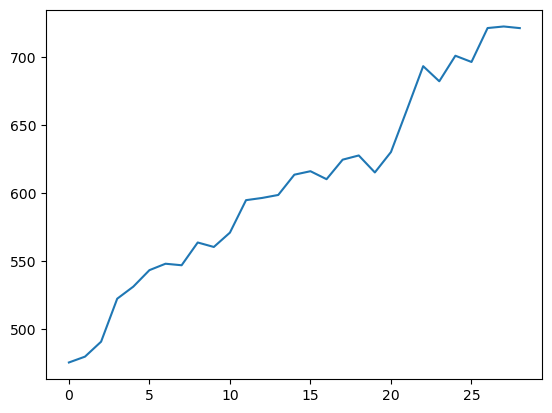

In [264]:
plt.plot(dfZlstm , label='True Value')

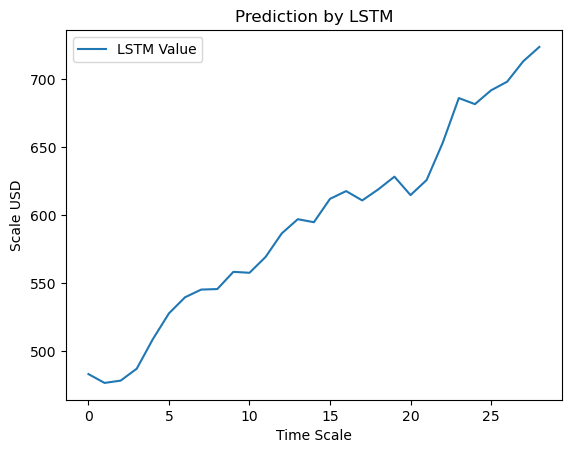

In [265]:
plt.plot(Z_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scale USD')
plt.legend()
plt.show() 

In [266]:
Z_pred.shape

(29, 1)

In [267]:
dfZlstm.shape

(29, 1)

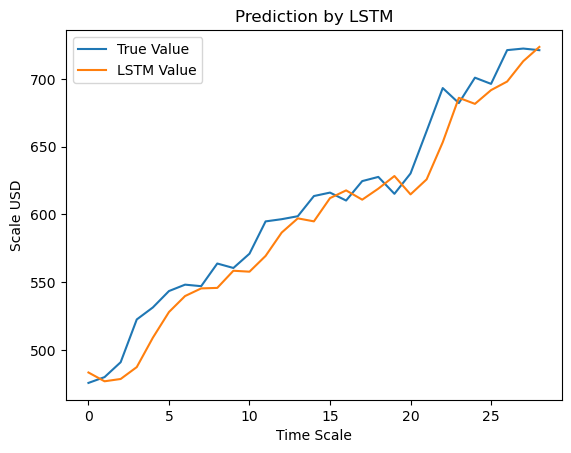

In [268]:
plt.plot(dfZlstm, label='True Value')
plt.plot(Z_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scale USD')
plt.legend()
plt.show() 

In [269]:
calculate_rmse(dfZlstm, Z_pred)

17.151687590821837

In [270]:
calculate_mape(dfZlstm, Z_pred)

2.2605348929073594

In [271]:
#saving models

In [272]:
#load model using:
#LR20 = joblib.load('20dLR')
#LR20.predict()

In [273]:
joblib.dump(model_20d,'20dLR')

['20dLR']

In [274]:
joblib.dump(model_50d,'50dLR')

['50dLR']

In [275]:
joblib.dump(knn,'knn')

['knn']

In [276]:
joblib.dump(svm, 'svm')

['svm']

In [277]:
joblib.dump(rf,'rf')

['rf']

In [278]:
pip install h5py

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [280]:
lstm.save('lstm_model.keras')

In [281]:
# def predict(Open, High, Low, Close):
#     dx = pd.DataFrame({
#         'Open':Open,
#         'High':High,
#         'Low':Low,
#         'Close':Close
#     })
#     features = ['Open', 'High', 'Low', 'Close']
#     scaler = MinMaxScaler()
#     dxfeature_transform = scaler.fit_transform(dx[features])
#     dxfeature_transform= pd.DataFrame(columns=features, data=dxfeature_transform)
#     trainx =np.array(dxfeature_transform)
#     x_train = trainx.reshape(dfXfeature_transform.shape[0], 1, dfXfeature_transform.shape[1])
#     x_pred= lstm.predict(x_train)
#     return x_pred
    
    

In [282]:
Open = [492.440002]
Close = [481.679993]
High = [492.950012]
Low = [475.950012]

In [283]:
dx = pd.DataFrame({
        'Open': Open,
        'High': High,
        'Low': Low,
        'Close': Close
    })

In [284]:
# Calculate the average of Open, High, Low, and Close
dx1 = dx[['Open', 'High', 'Low', 'Close']].mean(axis=1)

# Create a new DataFrame with the average values
dx1 = pd.DataFrame(dx1, columns=['Average'])

In [619]:
dx1

Average
0  485.755005

In [285]:
dx1.shape

(1, 1)

In [286]:
dx.shape

(1, 4)

In [287]:
dx

Open        High         Low       Close
0  492.440002  492.950012  475.950012  481.679993

In [288]:
# List of features
features = ['Open', 'High', 'Low', 'Close']

# Scale the features
scaler = MinMaxScaler()
dx_feature_transform = scaler.fit_transform(dx[features])

# Convert to DataFrame
dx_feature_transform = pd.DataFrame(columns=features, data=dx_feature_transform)

In [289]:
dx_feature_transform.shape

(1, 4)

In [290]:
trainx =np.array(dx_feature_transform)

In [291]:
trainx.shape

(1, 4)

In [292]:
x_train = trainx.reshape(dx_feature_transform.shape[0], 1, dx_feature_transform.shape[1])

In [293]:
x_train.shape

(1, 1, 4)

In [294]:
x_pred= lstm.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [295]:
x_pred

array([[0.00489765]], dtype=float32)

In [296]:
scaler = MinMaxScaler()
dx1_feature_transform = scaler.fit_transform(dx1['Average'].values.reshape(-1, 1))

# Convert scaled values back to DataFrame
dx_1feature_transform = pd.DataFrame(dx1_feature_transform, columns=['Scaled_Average'])

In [297]:
x_pred = scaler.inverse_transform(x_pred)

In [298]:
x_pred

array([[485.7599]], dtype=float32)

In [299]:
def predict(Open, High, Low, Close):
    dx = pd.DataFrame({
        'Open': [Open],
        'High': [High],
        'Low': [Low],
        'Close': [Close]
    })
    # Calculate the average of Open, High, Low, and Close
    dx1 = dx[['Open', 'High', 'Low', 'Close']].mean(axis=1)
    #Create a new DataFrame with the average values
    dx1 = pd.DataFrame(dx1, columns=['Average'])
    # List of features
    features = ['Open', 'High', 'Low', 'Close']
    # Scale the features
    scaler = MinMaxScaler()
    dx_feature_transform = scaler.fit_transform(dx[features])
    # Convert to DataFrame
    dx_feature_transform = pd.DataFrame(columns=features, data=dx_feature_transform)
    trainx =np.array(dx_feature_transform)
    x_train = trainx.reshape(dx_feature_transform.shape[0], 1, dx_feature_transform.shape[1])
    x_pred= lstm.predict(x_train)
    scaler = MinMaxScaler()
    dx1_feature_transform = scaler.fit_transform(dx1['Average'].values.reshape(-1, 1))
    # Convert scaled values back to DataFrame
    dx_1feature_transform = pd.DataFrame(dx1_feature_transform, columns=['Scaled_Average'])
    x_pred = scaler.inverse_transform(x_pred)
    return x_pred
    

In [300]:
predict(492.440002, 492.950012, 475.950012, 481.679993)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[485.7599]], dtype=float32)